Bộ dữ liệu GDP list chứa dữ liệu dự báo về GDP của một số quốc gia, các thông tin được thống kê bao gồm:

- Country: Tên quốc gia
- Continent: Tên châu lục
- GDP (millions of US$): GDP tính theo đơn vị triệu USD

1. Đọc bộ dữ liệu, cho biết số dòng, số cột và kiểu dữ liệu của các thuộc tính.
2. Tính giá trị lớn nhất và nhỏ nhất của GDP.
3. Hãy cho biết xu hướng phân bố dữ liệu của GDP.
4. Hãy cho biết châu lục nào xuất hiện nhiều nhất?
5. Với mỗi châu lục hãy tính tổng GDP; trung bình cộng GDP. Hợp nhất 2 bảng này thành một bảng duy nhất gồm 3 thông tin: Tên châu lục; Tổng GDP; TBC GDP.

In [1]:
import pandas as pd
data=pd.read_csv('Datasets\GDPlist.csv', encoding = "ISO-8859-1")
# hiển thị 5 dòng dữ liệu đầu tiên
data.head()

,Country,Continent,GDP (millions of US$)
0,Afghanistan,Asia,18181
1,Albania,Europe,12847
2,Algeria,Africa,190709
3,Angola,Africa,100948
4,Argentina,South America,447644


In [2]:
# 1.Đọc bộ dữ liệu, cho biết số dòng, số cột và kiểu dữ liệu của các thuộc tính.
print (data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Country                125 non-null    object
 1   Continent              125 non-null    object
 2   GDP (millions of US$)  125 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.1+ KB
None


In [3]:
# Country, Continent: thuộc tính định tính - nominal
# GDP: thuộc tính định lượng - ratio
data.columns

Index(['Country', 'Continent', 'GDP (millions of US$)'], dtype='object')

In [4]:
# 2.Tính giá trị lớn nhất và nhỏ nhất của GDP.
print("Min GPD: " + str(data['GDP (millions of US$)'].min()))

print("Max GPD: " + str(data['GDP (millions of US$)'].max()))

Min GPD: 10600
Max GPD: 15094025


Trung bình GDP: 555427.784
Độ lệch chuẩn GDP: 1649265.6802574366
Trung vị của GDP: 96089.0


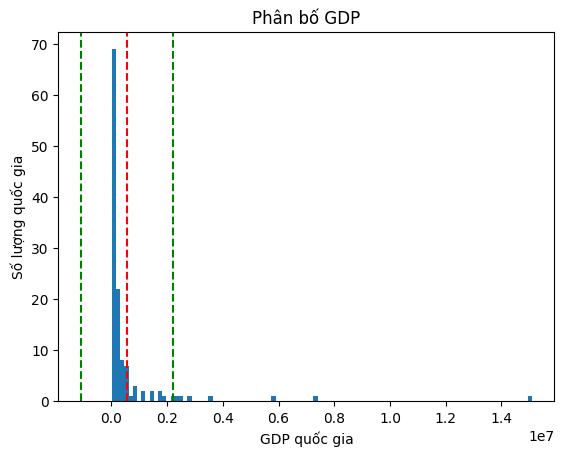

In [5]:
# 3.Hãy cho biết xu hướng phân bố dữ liệu của GDP.

# Vẽ biểu đồ GDP ở các quốc gia

# Tính giá trị trung bình và độ lệch chuẩn của GDP
mean_gdp = data['GDP (millions of US$)'].mean()
std_gdp = data['GDP (millions of US$)'].std()

print ("Trung bình GDP: " + str(mean_gdp))
print ("Độ lệch chuẩn GDP: " + str(std_gdp))
print ("Trung vị của GDP: "+ str(data['GDP (millions of US$)'].median()))

import matplotlib.pyplot as plt

# Tạo histogram để hiển thị phân bố tần suất của GDP
plt.hist(data['GDP (millions of US$)'], bins = 100)
plt.title("Phân bố GDP")
plt.xlabel("GDP quốc gia")
plt.ylabel("Số lượng quốc gia")

# Hiển thị giá trị trung bình và độ lệch chuẩn trên biểu đồ
plt.axvline(x=mean_gdp, color='r', linestyle='--')
plt.axvline(x=mean_gdp + std_gdp, color='g', linestyle='--')
plt.axvline(x=mean_gdp - std_gdp, color='g', linestyle='--')

# Hiển thị biểu đồ
plt.show()

- Với trung vị của dữ liệu GDP là 96089, nghĩa là 50% quốc gia trong dữ liệu có mức GDP thấp hơn 96k, và 50% quốc gia có mức GDP cao hơn 96k. Tuy nhiên, với trung bình của dữ liệu GDP là 555427.784, có nghĩa là các giá trị GDP lớn hơn trung bình sẽ có tần suất thấp hơn so với các giá trị GDP nhỏ hơn trung bình, do đó dữ liệu có xu hướng lệch trái.

- Vậy, kết luận về xu hướng phân bố dữ liệu GDP là không có phân bố chuẩn và có xu hướng lệch trái.

In [6]:
#Mỗi châu lục có bao nhiêu quốc gia nằm trong bảng dữ liệu
data.Continent.value_counts()

Europe           37
Asia             36
Africa           29
North America    11
South America     9
Oceania           3
Name: Continent, dtype: int64

In [11]:
#Tổng GPD của các châu lục
GDP_total = data.groupby(['Continent'])['GDP (millions of US$)'].sum().sort_values(ascending= False)
GDP_total

Continent
Asia             24425891
Europe           19139380
North America    18238447
South America     4141217
Africa            1820811
Oceania           1662727
Name: GDP (millions of US$), dtype: int64

In [8]:
GDP_avg = data.groupby(['Continent'])['GDP (millions of US$)'].median().sort_values(ascending= False)
GDP_avg

Continent
South America    248411.0
Asia             194439.0
Europe           189776.0
Oceania          161851.0
North America     40947.0
Africa            24604.0
Name: GDP (millions of US$), dtype: float64

In [23]:
df1=pd.merge(GDP_total,GDP_avg, on='Continent')
df1.columns
#df1.rename(columns = {'test':'TEST'}, inplace = True)
#df1

Index(['GDP (millions of US$)_x', 'GDP (millions of US$)_y'], dtype='object')

In [25]:
df1.rename(columns = {'GDP (millions of US$)_x':'GDP Total', 'GDP (millions of US$)_y':'GDP Average'}, inplace = True)
df1

,GDP Total,GDP Average
Continent,,
Asia,24425891,194439.0
Europe,19139380,189776.0
North America,18238447,40947.0
South America,4141217,248411.0
Africa,1820811,24604.0
Oceania,1662727,161851.0


In [ ]:
#Top 10 quốc gia có GDP cao nhất
print ("10 quốc gia có GDP cao nhất")
data = data.sort_values('GDP (millions of US$)',ascending = False)
data.head(10)

10 quốc gia có GDP cao nhất


,Country,Continent,GDP (millions of US$)
118,United States,North America,15094025
23,China,Asia,7298147
60,Japan,Asia,5869471
44,Germany,Europe,3577031
41,France,Europe,2776324
15,Brazil,South America,2492908
117,United Kingdom,Europe,2417570
58,Italy,Europe,2198730
93,Russia,Asia,1850401
21,Canada,North America,1736869
